### Ensemble
- 보팅(Voting) : 같은 데이터 세트를 이용하고, 서로 다른 분류 알고리즘을 사용하여 최종 예측
- 보팅의 유형 : 하드보팅(다수결) / 소프트 보팅(확률)
- 하드보팅보다는 소프트 보팅이 예측성능이 상대적으로 우수하여 주로 사용
-
- 배깅(Bagging) : 데이터 샘플링을 통해 서브세트를 만들고, 같은 분류 알고리즘을 사용하여 최종 예측
- 배깅의 유형 : Decison Tree를 기반으로 한 랜덤 포레스트(확률)

In [12]:
# 분류기
from sklearn.tree         import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# SVN
from sklearn.svm import SVC

# KNN
from sklearn.neighbors import KNeighborsClassifier


# 앙상블
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

# 전처리
from sklearn.preprocessing   import LabelEncoder , OneHotEncoder , StandardScaler , MinMaxScaler , Binarizer 
from sklearn.model_selection import train_test_split , GridSearchCV

# 평가지표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_curve , roc_curve

# pandas, numpy, seaborn, 시각화
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

# 결측값 시각화
import missingno as ms
%matplotlib inline

# 경고문구
import warnings
warnings.filterwarnings('ignore')

# datasets
from sklearn.datasets import load_breast_cancer


### 1. Voting Classifier

In [5]:
# data load
cancer = load_breast_cancer()
print(cancer, type(cancer))

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
# Bunch type --> Dataframe type
cancerDF = pd.DataFrame(cancer.data, 
                        columns = cancer.feature_names)
cancerDF

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [39]:
# 앙상블을 위한 모델 만들기
features, labels = cancer.data, cancer.target

print(features)
print(labels)
print(features.shape, labels.shape)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [40]:
# dataset 나누기
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=10)


In [42]:
# 앙상블 구현을 위한 분류모델 4개 써보기(tree, logistic, knn, svm)

# Decision Tree
tree = DecisionTreeClassifier(criterion = 'entropy',
                              random_state = 10)

tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

# Logistic
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
logistic_pred = logistic.predict(X_test)


# KNN
knn = KNeighborsClassifier(n_neighbors = 250)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)


# SVM 
svm = SVC(probability=True)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

In [43]:
# 정확도
print('tree :' ,     accuracy_score(y_test, tree_pred))
print('logistic :' , accuracy_score(y_test, logistic_pred))
print('knn :' ,      accuracy_score(y_test, knn_pred))
print('svm :' ,      accuracy_score(y_test, svm_pred))

tree : 0.9210526315789473
logistic : 0.9298245614035088
knn : 0.8421052631578947
svm : 0.9210526315789473


In [45]:
# soft voting 구현
voting_clf = VotingClassifier(estimators = [('tree', tree),('logistic', logistic), ('knn', knn),('svm', svm)],
                              weights = [1,1,1,1], 
                              voting = 'soft') 
voting_clf.fit(X_train, y_train)
soft_voting_pred = voting_clf.predict(X_test)
print('soft voting :' , accuracy_score(y_test, soft_voting_pred))

soft voting : 0.9298245614035088


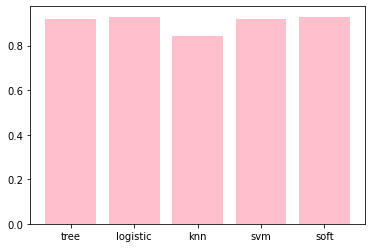

In [46]:
# visualization
plt.figure()

# x축이 없으므로 만들어 줘야함
x = np.arange(5)
plt.bar(x, height=[accuracy_score(y_test, tree_pred),
                   accuracy_score(y_test, logistic_pred), 
                   accuracy_score(y_test, knn_pred), 
                   accuracy_score(y_test, svm_pred), 
                   accuracy_score(y_test, soft_voting_pred)],
                   color = 'pink')

plt.xticks(x, ['tree', 'logistic', 'knn', 'svm', 'soft'])
plt.show()
plt.close()

### Practice Voting 

In [6]:
from sklearn.datasets import load_digits

In [7]:
# mnist data로 연습!(0~9의 손글씨체)
mnist = load_digits()
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [10]:
# feature, label값 설정
# 0 ~255의 숫자가 들어가는 1차원의 벡터 형식으로 만듦
features, labels = mnist.data, mnist.target

print(features)
print(labels)
print(features.shape, labels.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
(1797, 64) (1797,)


In [11]:
# dataset 나누기
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=100)

In [14]:
# 성능평가 확인을 위한 함수

def metrics_evaluation(y_test, y_pred) :
    print('정확도 : {}, 정밀도 : {}, 재현율 : {}, 조화평균 : {}, AUC : {}'
          .format(accuracy_score(y_test, y_pred),
                  precision_score(y_test, y_pred),
                  recall_score(y_test, y_pred),
                  f1_score(y_test, y_pred),
                  roc_auc_score(y_test, y_proba)))

In [25]:
# Decision Tree 객체 생성, 튜닝은 하고싶은대로 01)
dt = DecisionTreeClassifier(criterion = 'entropy',
                            max_depth = 8,
                            max_features = 32,
                            random_state = 35)

# 학습
dt.fit(X_train, y_train)
# 예측
dt_pred = dt.predict(X_test)




# KNN 객체 생성, 튜닝은 하고싶은대로 02)
knn = KNeighborsClassifier(n_neighbors = 299)
# 학습
knn.fit(X_train, y_train)
# 예측
knn_pred = knn.predict(X_test)




# SVM 객체 생성, 튜닝은 하고싶은대로 03)
svm = SVC(probability=True)
# 학습
svm.fit(X_train, y_train)
# 예측
svm_pred = svm.predict(X_test)

In [26]:
# Decision Tree 정확도
print('target :', y_test)
print('predictt :', dt_pred)
print('tree :' , accuracy_score(y_test, dt_pred))

target : [9 9 0 2 4 5 7 4 7 2 4 5 7 5 9 6 1 1 5 2 8 7 6 6 6 7 0 2 8 3 0 9 3 9 5 5 3
 6 3 6 1 1 5 2 0 4 8 3 7 4 1 5 5 1 4 8 8 7 3 9 6 3 5 4 2 6 3 6 6 6 8 4 6 0
 6 6 2 1 6 3 1 3 3 1 1 4 0 5 5 4 1 7 0 0 8 7 4 2 7 5 4 0 9 3 4 5 7 2 5 5 5
 2 1 3 2 0 1 4 7 3 2 1 9 6 0 7 0 7 5 0 7 6 0 2 8 2 0 7 6 3 4 5 0 3 9 0 8 0
 3 6 8 1 4 1 8 9 0 0 6 2 2 7 5 9 2 4 1 5 3 4 2 0 6 9 3 1 0 0 7 4 4 4 3 9 5
 3 4 9 2 8 2 4 4 7 2 7 1 0 8 3 8 6 9 9 0 3 1 5 3 8 0 6 8 6 2 9 9 2 6 2 1 4
 4 2 8 0 7 2 7 2 6 4 0 9 0 5 0 3 3 9 0 2 7 0 1 2 2 7 3 2 0 2 2 5 1 2 6 7 0
 5 9 3 5 2 2 6 4 7 9 4 0 9 0 8 7 0 9 1 0 7 1 6 0 5 9 9 6 8 7 4 2 7 1 0 6 1
 9 6 1 8 7 9 9 7 9 2 1 5 2 5 9 6 1 2 9 0 7 3 0 7 8 4 5 8 4 7 8 4 5 6 6 9 5
 4 5 8 6 1 7 3 9 7 8 1 7 8 4 9 2 5 8 6 6 3 6 4 9 6 7 3]
predictt : [9 9 0 2 4 5 7 4 4 2 4 5 7 5 3 6 8 1 5 2 8 7 6 6 6 7 0 2 8 3 0 9 3 9 5 5 3
 6 3 6 8 1 5 2 0 4 8 3 7 4 1 5 5 1 4 8 8 7 3 9 6 3 5 4 0 6 3 6 6 6 8 5 6 0
 6 6 2 3 4 3 4 3 3 1 1 4 0 5 5 4 1 7 0 0 8 7 4 0 7 5 4 0 3 3 4 5 7 2 5 5 5
 2 1 3 2 0 1 7 7 3 2 1 9

In [27]:
# KNN 정확도
print('target :', y_test)
print('predictt :', dt_pred)
print('knn :' , accuracy_score(y_test, knn_pred))

target : [9 9 0 2 4 5 7 4 7 2 4 5 7 5 9 6 1 1 5 2 8 7 6 6 6 7 0 2 8 3 0 9 3 9 5 5 3
 6 3 6 1 1 5 2 0 4 8 3 7 4 1 5 5 1 4 8 8 7 3 9 6 3 5 4 2 6 3 6 6 6 8 4 6 0
 6 6 2 1 6 3 1 3 3 1 1 4 0 5 5 4 1 7 0 0 8 7 4 2 7 5 4 0 9 3 4 5 7 2 5 5 5
 2 1 3 2 0 1 4 7 3 2 1 9 6 0 7 0 7 5 0 7 6 0 2 8 2 0 7 6 3 4 5 0 3 9 0 8 0
 3 6 8 1 4 1 8 9 0 0 6 2 2 7 5 9 2 4 1 5 3 4 2 0 6 9 3 1 0 0 7 4 4 4 3 9 5
 3 4 9 2 8 2 4 4 7 2 7 1 0 8 3 8 6 9 9 0 3 1 5 3 8 0 6 8 6 2 9 9 2 6 2 1 4
 4 2 8 0 7 2 7 2 6 4 0 9 0 5 0 3 3 9 0 2 7 0 1 2 2 7 3 2 0 2 2 5 1 2 6 7 0
 5 9 3 5 2 2 6 4 7 9 4 0 9 0 8 7 0 9 1 0 7 1 6 0 5 9 9 6 8 7 4 2 7 1 0 6 1
 9 6 1 8 7 9 9 7 9 2 1 5 2 5 9 6 1 2 9 0 7 3 0 7 8 4 5 8 4 7 8 4 5 6 6 9 5
 4 5 8 6 1 7 3 9 7 8 1 7 8 4 9 2 5 8 6 6 3 6 4 9 6 7 3]
predictt : [9 9 0 2 4 5 7 4 4 2 4 5 7 5 3 6 8 1 5 2 8 7 6 6 6 7 0 2 8 3 0 9 3 9 5 5 3
 6 3 6 8 1 5 2 0 4 8 3 7 4 1 5 5 1 4 8 8 7 3 9 6 3 5 4 0 6 3 6 6 6 8 5 6 0
 6 6 2 3 4 3 4 3 3 1 1 4 0 5 5 4 1 7 0 0 8 7 4 0 7 5 4 0 3 3 4 5 7 2 5 5 5
 2 1 3 2 0 1 7 7 3 2 1 9

In [28]:
# SVM 정확도
print('target :', y_test)
print('predictt :', dt_pred)
print('svm :' , accuracy_score(y_test, svm_pred))

target : [9 9 0 2 4 5 7 4 7 2 4 5 7 5 9 6 1 1 5 2 8 7 6 6 6 7 0 2 8 3 0 9 3 9 5 5 3
 6 3 6 1 1 5 2 0 4 8 3 7 4 1 5 5 1 4 8 8 7 3 9 6 3 5 4 2 6 3 6 6 6 8 4 6 0
 6 6 2 1 6 3 1 3 3 1 1 4 0 5 5 4 1 7 0 0 8 7 4 2 7 5 4 0 9 3 4 5 7 2 5 5 5
 2 1 3 2 0 1 4 7 3 2 1 9 6 0 7 0 7 5 0 7 6 0 2 8 2 0 7 6 3 4 5 0 3 9 0 8 0
 3 6 8 1 4 1 8 9 0 0 6 2 2 7 5 9 2 4 1 5 3 4 2 0 6 9 3 1 0 0 7 4 4 4 3 9 5
 3 4 9 2 8 2 4 4 7 2 7 1 0 8 3 8 6 9 9 0 3 1 5 3 8 0 6 8 6 2 9 9 2 6 2 1 4
 4 2 8 0 7 2 7 2 6 4 0 9 0 5 0 3 3 9 0 2 7 0 1 2 2 7 3 2 0 2 2 5 1 2 6 7 0
 5 9 3 5 2 2 6 4 7 9 4 0 9 0 8 7 0 9 1 0 7 1 6 0 5 9 9 6 8 7 4 2 7 1 0 6 1
 9 6 1 8 7 9 9 7 9 2 1 5 2 5 9 6 1 2 9 0 7 3 0 7 8 4 5 8 4 7 8 4 5 6 6 9 5
 4 5 8 6 1 7 3 9 7 8 1 7 8 4 9 2 5 8 6 6 3 6 4 9 6 7 3]
predictt : [9 9 0 2 4 5 7 4 4 2 4 5 7 5 3 6 8 1 5 2 8 7 6 6 6 7 0 2 8 3 0 9 3 9 5 5 3
 6 3 6 8 1 5 2 0 4 8 3 7 4 1 5 5 1 4 8 8 7 3 9 6 3 5 4 0 6 3 6 6 6 8 5 6 0
 6 6 2 3 4 3 4 3 3 1 1 4 0 5 5 4 1 7 0 0 8 7 4 0 7 5 4 0 3 3 4 5 7 2 5 5 5
 2 1 3 2 0 1 7 7 3 2 1 9

In [29]:
# hard voting : 같은 데이터로 서로다른 분류 알고리즘을 사용(다수결)
voting_clf = VotingClassifier(estimators = [('tree', dt),('knn', knn),('svm', svm)], # 사용한 분류기를 튜플형식으로
                              weights = [1,1,1], # 가중치를 1:1:1으로 줌
                              voting = 'hard') # hard / soft

voting_clf.fit(X_train, y_train)
hard_voting_pred = voting_clf.predict(X_test)
print('hard voting :' , accuracy_score(y_test, hard_voting_pred))

hard voting : 0.9611111111111111


In [32]:
# soft voting : 같은 데이터로 서로다른 분류 알고리즘을 사용(확률)
voting_clf = VotingClassifier(estimators = [('tree', dt),('knn', knn),('svm', svm)], # 사용한 분류기를 튜플형식으로
                              weights = [1,1,1], # 가중치를 1:1:1으로 줌
                              voting = 'soft') # hard / soft

voting_clf.fit(X_train, y_train)
soft_voting_pred = voting_clf.predict(X_test)
print('soft voting :' , accuracy_score(y_test, soft_voting_pred))

soft voting : 0.9388888888888889


In [34]:
# result
print('tree :' , accuracy_score(y_test, dt_pred))
print('svm :' , accuracy_score(y_test, svm_pred))
print('knn :' , accuracy_score(y_test, knn_pred))
print('hard voting :' , accuracy_score(y_test, hard_voting_pred))
print('soft voting :' , accuracy_score(y_test, soft_voting_pred))

tree : 0.8694444444444445
svm : 0.9916666666666667
knn : 0.8555555555555555
hard voting : 0.9611111111111111
soft voting : 0.9388888888888889


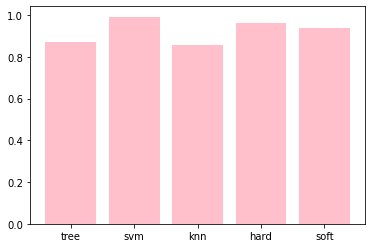

In [37]:
# result visualization
plt.figure()

# x축이 없으므로 만들어 줘야함
x = np.arange(5)
plt.bar(x, height=[accuracy_score(y_test, dt_pred),
                   accuracy_score(y_test, svm_pred), 
                   accuracy_score(y_test, knn_pred), 
                   accuracy_score(y_test, hard_voting_pred), 
                   accuracy_score(y_test, soft_voting_pred)],
                   color = 'pink')

plt.xticks(x, ['tree', 'svm', 'knn', 'hard', 'soft'])
plt.show()
plt.close()